# Variables processing

- https://www.youtube.com/playlist?list=PLTp22zwXLwreSR9MBy76igBAAjrQ6F_rb

In [91]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


## Importing the data

In [92]:
train_data = pd.read_csv("../data/pre-processed/train.csv", delimiter=",",header=0, index_col=0)
sale_price = train_data["SalePrice"]
train_data = train_data.drop("SalePrice",axis=1)
print(train_data.shape)
train_data.head()

(1460, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [93]:
test_data = pd.read_csv("../data/pre-processed/test.csv", delimiter=",",header=0, index_col=0)
print(test_data.shape)
test_data.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Datasets will be concatenated in order to have more efficient preocessing.

## Data concatenation

In [94]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]

concat_data = pd.concat((train_data, test_data)).reset_index(drop=True)

nindex, nfeatures = concat_data.shape

## Missing values study

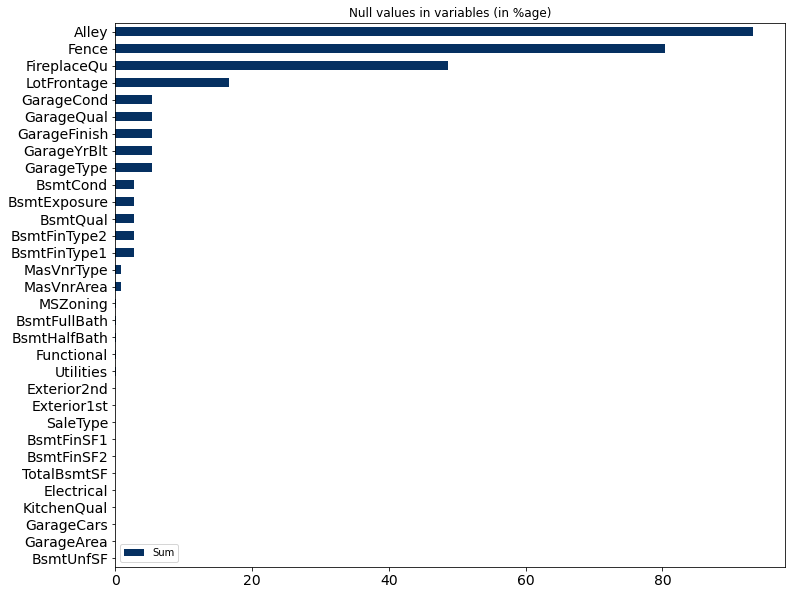

In [101]:
## Get the dataframe with all the features and SUM of the NaN values present
df_null_count = concat_data.isnull().sum(axis=0).to_frame().rename({0:"Sum"}, axis=1)

## Select only those features who have atleast 1 NaN value
df_null_count = df_null_count[df_null_count['Sum'] > 0]

## Change the SUM to PERCENTAGE 
df_null_count['Sum'] = df_null_count['Sum']*(100/nindex)

## Plot a Horizontal Bar Graph
df_null_count.sort_values(by="Sum", ascending=True).plot(kind='barh', figsize=(12,10),
                                                         fontsize=14, colormap="RdBu_r",
                                                         title="Null values in variables (in %age)")
plt.show()

## Categorical Variables

Here we will group the categorical variables to process them

In [96]:
## PoolQC
concat_data["PoolQC"] = concat_data["PoolQC"].fillna("None")
quality_map = {"None": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
concat_data["PoolQC"].replace({"None":0,"Fa":1,"TA":2,"Gd":3,"Ex":4},inplace=True)

['None' 'Ex' 'Fa' 'Gd']
[0 4 1 3]


In [100]:
## MiscFeature
concat_data["MiscFeature"] = concat_data["MiscFeature"].fillna("None")
concat_data["MiscFeature"].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [102]:
## Alley
concat_data["Alley"] = concat_data["Alley"].fillna("None")
concat_data["Alley"].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

In [106]:
## Fence
concat_data["Fence"] = concat_data["Fence"].fillna("None")
concat_data["Fence"].unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

## Quantitative Variables

Here we will group the quantitative variables to process them

In [97]:
quantitative_variables = []